In [1]:
!pip install transformers
!pip install umap-learn

In [2]:
from google.colab import drive
import pandas as pd
from pipeline import Pipeline

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Тест

In [3]:
data = pd.read_csv('/content/drive/MyDrive/sarawan_data/data/prepared_data/new_auchan_perek_without_ingredients.csv', nrows=100)
data.reset_index(inplace=True, drop=True)
data.head()

,name,image,attributes,cat1,cat2,attributes_prepared,common_attributes,name_prepared,cat3
0,"Торт Kristof клубника со сливками, 450 г",small_1000d62a27c1704e71336b046d4e4f3838e85f75...,"{'Бренд': 'Kristof', 'Вид упаковки': 'Пластик'...",Сладости,Торты,kristof пластик ягодный 4.4 19 0.45 0.499 моло...,kristof пластик ягодный молоко крем маскарпон...,торт kristof клубника сливка,NaN
1,"Набор одноразовых стаканов Actuel пластик, 20х...",small_4ed8d12281a9102b9777887b51b814195a190945...,"{'Бренд': 'Actuel', 'Масса нетто, кг': '0.2', ...",Кухня,"Стаканы, бокалы",actuel 0.2 0.2 71 117 310 россия 0.2 кг 20х200 мл,actuel,набор одноразовый стакан actuel пластик,NaN
2,"Сироп «Баринофф» десертный Вишня, 1 л",small_4abc7e4195076a6538d2ef5e84c89bcca4b73702...,"{'Бренд': 'Баринофф', 'Упаковка': 'Стеклянная ...",Сладости,Сиропы,баринофф стеклянный бутылка сироп сироп вишнёв...,баринофф сироп сироп сахар вода питьевой сок...,сироп баринофф десертный вишня,NaN
3,Пирожное «Медвежонок Барни» бисквитное с молоч...,small_7c4033e6867cdcfbdb3a847dc97d2401f06ce2d5...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный,NaN
4,Пирожное «Медвежонок Барни» бисквитное со сгущ...,small_bdbe36876182b6fd32dc9e0989ecfa0fef23baa1...,"{'Бренд': 'Барни', 'Белки на 100 г, г': '6', '...",Сладости,"Пирожные, десерты",барни 6 15 0.15 0.16 мука пшеничный сироп глюк...,барни мука пшеничный сироп глюкозный фруктозн...,пирожное медвежонок барни бисквитный сгустить ...,NaN


In [ ]:
pipeline = Pipeline(data, './all_photos/')
pipeline.extract_zip('/content/drive/MyDrive/sarawan_data/data/photo/auchan_perekrestok.zip')  # разархивировать фотки в локальную папку

In [4]:
pipeline = Pipeline(data, './all_photos/')  # data - данные со столбами names_prepared и т.д. img_dir - путь к папке где лежат фотки (по умолчанию ./all_photos/)
pipeline.train(num_epoch=10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the 

Epoch [0], img_loss: 1.729184377193451, attr_loss: 1.8483033657073975, names_bert_loss: 1.7792226195335388, arc_loss: 3.187536692619324, main_loss: 4.27212347984314

Epoch [0], img_accuracy1: 0.23, attr_accuracy1: 0.02, names_bert_accuracy1: 0.13, arc_accuracy1: 0.04

Epoch [0], img_accuracy5: 0.96, attr_accuracy5: 0.72, names_bert_accuracy5: 0.89, arc_accuracy5: 0.29




100%|██████████| 10/10 [00:01<00:00,  7.13it/s]


Epoch [1], img_loss: 1.7178698301315307, attr_loss: 1.8436806321144104, names_bert_loss: 1.7814574360847473, arc_loss: 3.098329520225525, main_loss: 3.8752132654190063

Epoch [1], img_accuracy1: 0.21000000000000002, attr_accuracy1: 0.030000000000000002, names_bert_accuracy1: 0.1, arc_accuracy1: 0.030000000000000002

Epoch [1], img_accuracy5: 0.96, attr_accuracy5: 0.74, names_bert_accuracy5: 0.86, arc_accuracy5: 0.32




100%|██████████| 10/10 [00:01<00:00,  5.67it/s]


Epoch [2], img_loss: 1.6974289774894715, attr_loss: 1.8398123145103455, names_bert_loss: 1.7797487378120422, arc_loss: 3.029466414451599, main_loss: 3.5774904251098634

Epoch [2], img_accuracy1: 0.21000000000000002, attr_accuracy1: 0.030000000000000002, names_bert_accuracy1: 0.11, arc_accuracy1: 0.030000000000000002

Epoch [2], img_accuracy5: 0.96, attr_accuracy5: 0.75, names_bert_accuracy5: 0.89, arc_accuracy5: 0.35000000000000003




100%|██████████| 10/10 [00:01<00:00,  6.42it/s]


Epoch [3], img_loss: 1.6698527812957764, attr_loss: 1.848485493659973, names_bert_loss: 1.7760385036468507, arc_loss: 2.972976231575012, main_loss: 3.357936644554138

Epoch [3], img_accuracy1: 0.24000000000000002, attr_accuracy1: 0.02, names_bert_accuracy1: 0.13, arc_accuracy1: 0.0

Epoch [3], img_accuracy5: 0.97, attr_accuracy5: 0.7, names_bert_accuracy5: 0.87, arc_accuracy5: 0.38




100%|██████████| 10/10 [00:02<00:00,  4.59it/s]


Epoch [4], img_loss: 1.6453279376029968, attr_loss: 1.8488431811332702, names_bert_loss: 1.771598744392395, arc_loss: 2.92738881111145, main_loss: 3.1958077430725096

Epoch [4], img_accuracy1: 0.24, attr_accuracy1: 0.02, names_bert_accuracy1: 0.1, arc_accuracy1: 0.05

Epoch [4], img_accuracy5: 0.97, attr_accuracy5: 0.7, names_bert_accuracy5: 0.9, arc_accuracy5: 0.45




100%|██████████| 10/10 [00:01<00:00,  5.14it/s]


Epoch [5], img_loss: 1.6229077100753784, attr_loss: 1.8447096586227416, names_bert_loss: 1.7765047550201416, arc_loss: 2.891444945335388, main_loss: 3.0783807754516603

Epoch [5], img_accuracy1: 0.3, attr_accuracy1: 0.02, names_bert_accuracy1: 0.1, arc_accuracy1: 0.05

Epoch [5], img_accuracy5: 0.97, attr_accuracy5: 0.74, names_bert_accuracy5: 0.91, arc_accuracy5: 0.47




100%|██████████| 10/10 [00:02<00:00,  4.94it/s]


Epoch [6], img_loss: 1.600710427761078, attr_loss: 1.8371737480163575, names_bert_loss: 1.776855754852295, arc_loss: 2.7809425830841064, main_loss: 2.914801239967346

Epoch [6], img_accuracy1: 0.33, attr_accuracy1: 0.02, names_bert_accuracy1: 0.11, arc_accuracy1: 0.11

Epoch [6], img_accuracy5: 0.97, attr_accuracy5: 0.77, names_bert_accuracy5: 0.88, arc_accuracy5: 0.47




100%|██████████| 10/10 [00:02<00:00,  4.60it/s]


Epoch [7], img_loss: 1.5841130137443542, attr_loss: 1.8432191014289856, names_bert_loss: 1.7769298076629638, arc_loss: 2.780910301208496, main_loss: 2.8731696128845217

Epoch [7], img_accuracy1: 0.33, attr_accuracy1: 0.030000000000000002, names_bert_accuracy1: 0.14, arc_accuracy1: 0.060000000000000005

Epoch [7], img_accuracy5: 0.97, attr_accuracy5: 0.71, names_bert_accuracy5: 0.87, arc_accuracy5: 0.51




100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


Epoch [8], img_loss: 1.5718002319335938, attr_loss: 1.8423335552215576, names_bert_loss: 1.7786097407341004, arc_loss: 2.7413246870040893, main_loss: 2.8059263229370117

Epoch [8], img_accuracy1: 0.33, attr_accuracy1: 0.030000000000000002, names_bert_accuracy1: 0.12, arc_accuracy1: 0.17

Epoch [8], img_accuracy5: 0.97, attr_accuracy5: 0.78, names_bert_accuracy5: 0.89, arc_accuracy5: 0.49




100%|██████████| 10/10 [00:01<00:00,  6.05it/s]


Epoch [9], img_loss: 1.5650295972824098, attr_loss: 1.8447143316268921, names_bert_loss: 1.775761365890503, arc_loss: 2.659498858451843, main_loss: 2.705576705932617

Epoch [9], img_accuracy1: 0.33, attr_accuracy1: 0.02, names_bert_accuracy1: 0.08, arc_accuracy1: 0.18000000000000002

Epoch [9], img_accuracy5: 0.97, attr_accuracy5: 0.72, names_bert_accuracy5: 0.92, arc_accuracy5: 0.57




In [5]:
pairs = pipeline.predict()  # возвращает пары [[косинус на 1 этапе, косинус на 2 этапе], индекс1, индекс2]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/r



Найденные идентичные продукты на 1-ом уровне с threshold = 0.7: [['Красота, гигиена, аптека', 0], ['Алкогольные напитки', 0], ['Сладости', 0], ['Снеки', 0], ['Кухня', 25], ['Молочные продукты', 0]]
Найденные идентичные продукты на 2-ом уровне с threshold = 0.999: 2


In [6]:
pairs

[[0.8114847469903167, array([[1.0000001]], dtype=float32), 17, 29],
 [0.9984135553408451, array([[1.0000001]], dtype=float32), 78, 79]]

<Figure size 2000x1000 with 0 Axes>

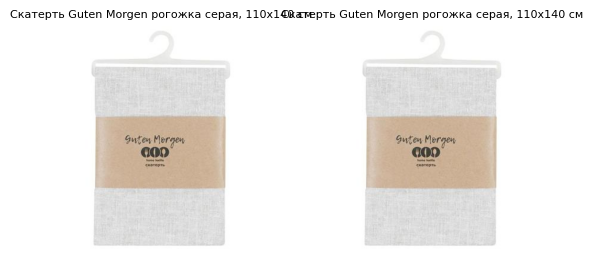

In [8]:
pipeline._show_imgs(data, 78, 79)